In [3]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#load NHTSA dataset
crash_data = pd.read_csv('crash_data.csv', encoding='latin1')
crash_data.head()

# Import model to divide data into training and testing sets
from sklearn.model_selection import train_test_split



In [4]:
target_column = ['MAN_COLLNAME']
#derive the list of predictor column id's
# Access the DataFrame's columns directly using crash_data.columns
predictors = list(set(list(crash_data.columns))-set(target_column))
#standardize the predictors by diividing by the maximum
# Access the desired columns using crash_data[predictors]
# Select only numeric columns for standardization
numeric_predictors = crash_data[predictors].select_dtypes(include=np.number).columns.tolist()
crash_data[numeric_predictors] = crash_data[numeric_predictors]/crash_data[numeric_predictors].max()
#provide summary statistics for the dataframe
# Access the desired columns using crash_data[predictors]
crash_data[predictors].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WRK_ZONE,38666.0,0.011050,0.091200,0.000000,0.000000,0.000000,0.000000,1.0
RELJCT1,38666.0,0.007615,0.036813,0.000000,0.000000,0.000000,0.000000,1.0
HOUR,38666.0,0.557262,0.307370,0.000000,0.304348,0.608696,0.826087,1.0
PERSONS,38666.0,0.017221,0.013928,0.007812,0.007812,0.015625,0.023438,1.0
HOSP_HR,38666.0,0.784562,0.328984,0.000000,0.888889,0.888889,1.000000,1.0
ST_CASE,38666.0,0.486123,0.293770,0.017855,0.217737,0.465890,0.750916,1.0
MINUTE,38666.0,0.487512,0.294815,0.000000,0.237288,0.508475,0.745763,1.0
LATITUDE,38666.0,0.366695,0.061611,0.192996,0.329782,0.361498,0.404088,1.0
RELJCT2,38666.0,0.023531,0.046502,0.010101,0.010101,0.010101,0.020202,1.0
DAY_WEEK,38666.0,0.590770,0.298051,0.142857,0.285714,0.571429,0.857143,1.0


In [5]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', sklearn.impute.SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), crash_data[predictors].select_dtypes(include=np.number).columns),
        ('cat', Pipeline([
            ('imputer', sklearn.impute.SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')) # sparse=False for SVM compatibility
        ]), crash_data[predictors].select_dtypes(include=['object']).columns)
    ])


In [6]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', svm.SVC(decision_function_shape='ovo'))
])

In [7]:
#Get rid of any rown with NA's
crash_data = crash_data.dropna()

In [8]:
#the input data
X = crash_data[predictors].values # Access the DataFrame directly using crash_data[predictors]
#the output data
y = crash_data[target_column].values # Access the DataFrame directly using crash_data[target_column]

In [9]:
#we encode target classes from strings to numbers as neural networks cannot require all numerical inputs and outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
# Divide data into training and test sets
X = crash_data[predictors]
y = crash_data[target_column].values
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
# Preprocess the training data
X_train_processed = preprocessor.fit_transform(X_train)

In [13]:
# Train the model
svm_model = svm.SVC(decision_function_shape='ovo')
svm_model.fit(X_train_processed, y_train)

SVC(decision_function_shape='ovo')

In [15]:
# Predict on the training data using the trained SVM model
# Transform the training data using the fitted preprocessor
predict_train = svm_model.predict(preprocessor.transform(X_train))

print('Training accuracy')
#we report the confusion matrix for the training set
print(confusion_matrix(y_train,predict_train))
#we report various accuracy statistics for the training set
print(classification_report(y_train,predict_train))

Training accuracy
[[ 67   0   0   0   0   0]
 [  0  35  14   0   0   0]
 [  0   0 120   0   0   0]
 [  2   0   0   0   0   0]
 [  5   0   0   0  20   0]
 [  0   0   0   0   0 300]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        67
           1       1.00      0.71      0.83        49
           2       0.90      1.00      0.94       120
           3       0.00      0.00      0.00         2
           4       1.00      0.80      0.89        25
           5       1.00      1.00      1.00       300

    accuracy                           0.96       563
   macro avg       0.80      0.75      0.77       563
weighted avg       0.96      0.96      0.96       563



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[ 32   0   0   4   1]
 [  0   2  11   0   1]
 [  0   1  51   0   2]
 [ 10   0   0   3   0]
 [  0   0   1   0 123]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        37
           1       0.67      0.14      0.24        14
           2       0.81      0.94      0.87        54
           4       0.43      0.23      0.30        13
           5       0.97      0.99      0.98       124

    accuracy                           0.87       242
   macro avg       0.73      0.63      0.64       242
weighted avg       0.85      0.87      0.85       242



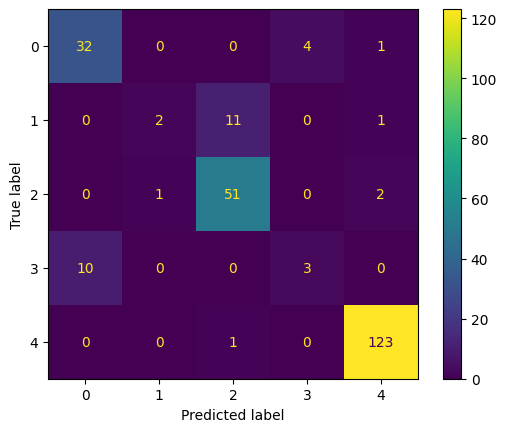

In [18]:
# Predict on the test data
# Transform the test data using the fitted preprocessor
predict_test = svm_model.predict(preprocessor.transform(X_test))

#we report the confusion matrix for the test set
cm = confusion_matrix(y_test,predict_test) # Assign the confusion matrix to cm
print(cm)
# Assuming cm_disp is an instance of ConfusionMatrixDisplay, plot it
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_disp.plot()

#we report various accuracy statistics for the test set
print(classification_report(y_test,predict_test))


0 = Angle
1 = Head on
2 = Rear end
3 = Rear to side
4 = the first event was not a collision with another vehicle


In [21]:
print(le.classes_)

['Angle' 'Head_On' 'Rear End' 'Rear-to-Side' 'Sideswipe '
 'The First Harmful Event was Not a Collision with a Motor Vehicle in Transport']
